## 5.1 Movie Review Classifier

In [1]:
# Load Libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### Load data

In [2]:
# Load the IMDB dataset
from tensorflow.keras.datasets import imdb
# split train / test data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

### Prepare data

In [3]:
# Encode the integer sequences via multi-hot encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [4]:
# Vectorize the data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# Vectorize the labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Build the model

In [6]:
# Define the model
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [7]:
# Compile the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validate the model

In [8]:
## Set aside a validation set (10,000 samples)
# Data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
# Labels
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 58ms/step - loss: 0.5014 - accuracy: 0.7978 - val_loss: 0.3834 - val_accuracy: 0.8739
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3055 - accuracy: 0.9045 - val_loss: 0.3056 - val_accuracy: 0.8871
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2251 - accuracy: 0.9285 - val_loss: 0.2785 - val_accuracy: 0.8899
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1796 - accuracy: 0.9422 - val_loss: 0.2843 - val_accuracy: 0.8864
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1450 - accuracy: 0.9537 - val_loss: 0.3013 - val_accuracy: 0.8798
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1212 - accuracy: 0.9643 - val_loss: 0.2968 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1002 - accuracy: 0.9692 - val_loss: 0.3117 - val_accuracy: 0.8840
Epoch 8/20
30

### Plot the model (because it's fun, but also useful)

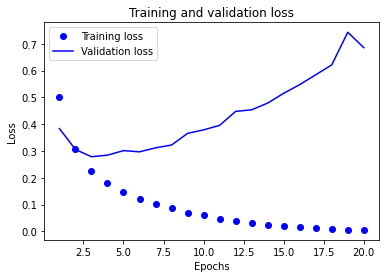

In [10]:
# Plot the training and validation LOSS
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss") # 'bo' blue dot
plt.plot(epochs, val_loss_values, "b", label="Validation loss") # 'b' blue line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

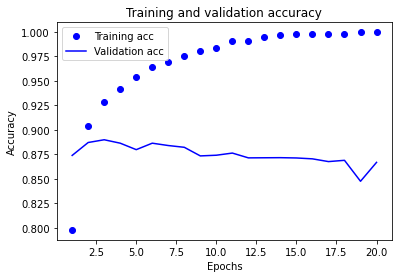

In [11]:
# Plot the training and validation ACCURACY
plt.clf()  # clear the figure
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Fit the model

In [12]:
# Fit model
model.fit(x_train, y_train, epochs=5, batch_size=512)

Epoch 1/5
49/49 [==============================] - 1s 12ms/step - loss: 0.2342 - accuracy: 0.9457
Epoch 2/5
49/49 [==============================] - 0s 9ms/step - loss: 0.1351 - accuracy: 0.9608
Epoch 3/5
49/49 [==============================] - 0s 10ms/step - loss: 0.1022 - accuracy: 0.9702
Epoch 4/5
49/49 [==============================] - 0s 9ms/step - loss: 0.0804 - accuracy: 0.9764
Epoch 5/5
49/49 [==============================] - 0s 8ms/step - loss: 0.0633 - accuracy: 0.9824


In [13]:
# Evaluate model
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.5165 - accuracy: 0.8593


In [14]:
# Show results
print(f'Test loss: {results[0]:0.2f}\nTest accuracy: {results[1]:0.2f}')

Test loss: 0.52
Test accuracy: 0.86


### Generate predictions

In [15]:
# Predict test data
model.predict(x_test)

array([[0.03135461],
       [1.        ],
       [0.9941303 ],
       ...,
       [0.22618642],
       [0.04548645],
       [0.97236645]], dtype=float32)

## 5.2 News Classifier

In [16]:
# Load libraries
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

### Load data

In [17]:
# Load the Reuters dataset
from tensorflow.keras.datasets import reuters
# split train / test data
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

### Prepare data

In [18]:
# Encode the integer sequences via multi-hot encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [19]:
# Vectorize the input data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [20]:
# Set up one-hot encoding
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [21]:
# One-hot encode the labels
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [22]:
# # Alternatively, use built-in one-hot encoding from Keras
# y_train = to_categorical(train_labels)
# y_test = to_categorical(test_labels)

### Build the model

In [23]:
# Define the model
model = keras.Sequential([
    layers.Dense(64, activation="relu"), # 64 > 46 to prevent information bottlneck
    layers.Dense(64, activation="relu"), # but 64 is still a power of 2
    layers.Dense(46, activation="softmax")
])

In [24]:
# Compile the model
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", # measures distance between 2 probabilty distributions
              metrics=["accuracy"])

### Validate the model

In [25]:
## Set aside a validation set (10,000 samples)
# Data
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
# Labels
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [26]:
# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 23ms/step - loss: 2.3713 - accuracy: 0.5308 - val_loss: 1.5902 - val_accuracy: 0.6700
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.3043 - accuracy: 0.7236 - val_loss: 1.2411 - val_accuracy: 0.7340
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 0.9878 - accuracy: 0.7910 - val_loss: 1.0831 - val_accuracy: 0.7710
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.7763 - accuracy: 0.8339 - val_loss: 1.0193 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6176 - accuracy: 0.8678 - val_loss: 0.9498 - val_accuracy: 0.8070
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4887 - accuracy: 0.8966 - val_loss: 0.9112 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.3886 - accuracy: 0.9201 - val_loss: 0.8878 - val_accuracy: 0.8300
Epoch 8/20
16

### Plot the model (obviously)

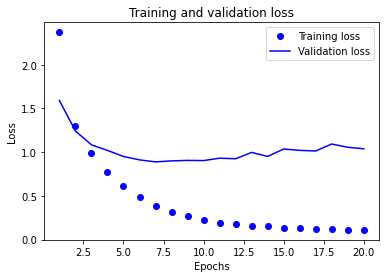

In [27]:
# Plot the training and validation LOSS
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

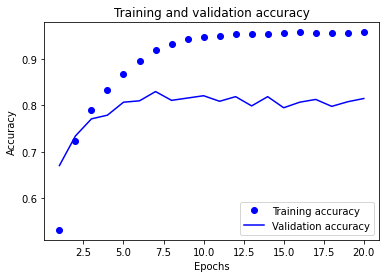

In [28]:
# Plot the training and validation ACCURACY
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Fit the model

In [29]:
# Fit model
model.fit(x_train,
          y_train,
          epochs=8,
          batch_size=512)

Epoch 1/8
18/18 [==============================] - 0s 14ms/step - loss: 0.2090 - accuracy: 0.9426
Epoch 2/8
18/18 [==============================] - 0s 13ms/step - loss: 0.1610 - accuracy: 0.9490
Epoch 3/8
18/18 [==============================] - 0s 12ms/step - loss: 0.1407 - accuracy: 0.9505
Epoch 4/8
18/18 [==============================] - 0s 13ms/step - loss: 0.1254 - accuracy: 0.9532
Epoch 5/8
18/18 [==============================] - 0s 12ms/step - loss: 0.1216 - accuracy: 0.9550
Epoch 6/8
18/18 [==============================] - 0s 12ms/step - loss: 0.1155 - accuracy: 0.9538
Epoch 7/8
18/18 [==============================] - 0s 11ms/step - loss: 0.1108 - accuracy: 0.9555
Epoch 8/8
18/18 [==============================] - 0s 11ms/step - loss: 0.1115 - accuracy: 0.9547


In [30]:
# Evaluate model
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.3120 - accuracy: 0.7836


In [31]:
# Show results
print(f'Test loss: {results[0]:0.2f}\nTest accuracy: {results[1]:0.2f}')

Test loss: 1.31
Test accuracy: 0.78


In [32]:
# Predict test data
predictions = model.predict(x_test)

In [33]:
predictions[0]

array([3.48079720e-06, 9.25358492e-08, 3.28505889e-10, 9.92874384e-01,
       6.57887897e-03, 6.35115571e-10, 7.22516624e-09, 3.05496940e-07,
       1.53063025e-04, 2.57252253e-07, 1.82865762e-07, 3.13629280e-05,
       1.01099226e-06, 5.63026106e-07, 8.50716191e-08, 2.04172568e-09,
       1.81938958e-05, 6.70381510e-08, 1.39096116e-07, 9.74014911e-05,
       2.21736875e-04, 1.08614395e-05, 1.95363228e-08, 5.39418522e-07,
       1.87050334e-10, 2.19110603e-07, 4.87431340e-09, 5.46801759e-09,
       2.13405400e-08, 9.47913676e-08, 1.12863468e-07, 1.24337665e-10,
       5.09006206e-08, 4.37079622e-10, 2.48710933e-07, 1.46079998e-07,
       5.86821579e-06, 1.89800815e-07, 3.08205557e-07, 5.77256953e-09,
       7.29827363e-08, 3.16452073e-08, 1.12424303e-09, 7.53020046e-09,
       2.60496819e-10, 4.55612525e-09], dtype=float32)

## 5.3 Housing Price Regression Model

In [34]:
# Load Libraries
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### Load data

In [35]:
# Load the Boston Housing dataset
from tensorflow.keras.datasets import boston_housing
# split train / test data
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

### Prepare data

In [36]:
## Perform feature-wise normalization
# Normalize train data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /=std
# Normalize test data
test_data -= mean
test_data /= std

### Build the model

In [37]:
def build_model():
    # Define the model
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1) # no activation function for scalar regression
    ])
    # Compile the model
    model.compile(optimizer="rmsprop", 
                  loss="mse", # mean squared error
                  metrics=["mae"]) # mean absolute error
    return model

### Validate the model

In [38]:
# Set up K-fold validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #: {i}")
    # prepare the validation data (from partition #k)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    # prepare training data (from non-k partitions)
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    # build the already compiled keras model
    model = build_model()
    
    # train the model, saving validation logs at each fold
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0) # verbose=0: silent mode
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #: 0
Processing fold #: 1
Processing fold #: 2
Processing fold #: 3


In [39]:
# Compute the average of per-epoch MAE scores for all folds
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

### Plot the validation scores

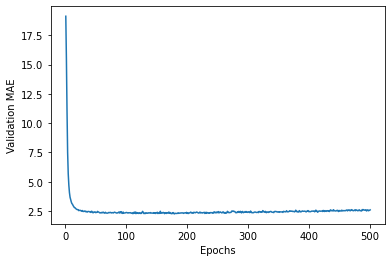

In [40]:
# Plot the validation MAE by epoch
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

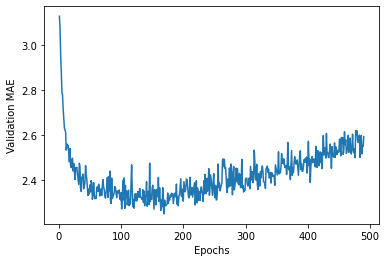

In [41]:
# Plot again, omitting the first 10 data points
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

### Train the final model

In [42]:
model = build_model() # get a fresh compiled model
# Train on the entirety of the training data
model.fit(train_data, train_targets,
         epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 16.0745 - mae: 2.5268


In [43]:
# Evaluate model
test_mae_score

2.5267951488494873

### Generate predictions

In [44]:
# Predict test data
predictions = model.predict(test_data)
predictions[0]

array([7.5473075], dtype=float32)